In [1]:
import os
os.chdir('../../..')
print(os.getcwd())

/Users/titonka/FAIRIS


In [2]:
from fairis_tools.experiment_tools.place_cell.PlaceCellLibrary import *
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
def generate_place_cell_network(centers, radius, name="out", save=False):
    """
    Generate a place cell network based on the provided circle centers.

    Parameters:
    - centers: List of (x, y) coordinates for the circle centers.
    - radius: Radius of the place cells.
    - name: Name of the file to save the network if save is True (default is "out").
    - save: Boolean flag to indicate whether to save the network to a file (default is False).

    Returns:
    - pc_network: An instance of PlaceCellNetwork containing the generated place cells.
    """
    # Create an instance of PlaceCellNetwork
    pc_network = PlaceCellNetwork()
    
    # Add place cells to the network for each center
    for x, y in centers:
        pc_network.add_pc_to_network(x, y, radius)
    
    # Save the network to a file if required
    if save:
        with open("data/GeneratedPCNetworks/" + name, 'wb') as pc_file:
            pickle.dump(pc_network, pc_file)
    
    return pc_network

def generate_square_grid(num_x, num_y, width, height):
    """
    Generate a square grid of points within a specified width and height, centered at (0, 0).

    Parameters:
    - num_x: Number of points along the x-axis.
    - num_y: Number of points along the y-axis.
    - width: Total width of the grid.
    - height: Total height of the grid.

    Returns:
    - centers: List of (x, y) coordinates representing the grid points.
    """
    # Generate linearly spaced values between -width/2 and width/2 for x
    xs = np.linspace(-width / 2, width / 2, num=num_x)
    # Generate linearly spaced values between -height/2 and height/2 for y
    ys = np.linspace(-height / 2, height / 2, num=num_y)
    
    # Create a list of (x, y) tuples representing the grid points
    centers = []
    for x in xs:
        for y in ys:
            centers.append((x, y))
    
    return centers

def generate_hex_grid(radius, width, height, overlap_ratio=0.8):
    """
    Generate a hexagonal grid with overlap between circles, minimizing the number of circles.
    
    Parameters:
    - radius: Radius of the circles.
    - width: Width of the square area.
    - height: Height of the square area.
    - overlap_ratio: Ratio to control overlap (0.0 for no overlap, <1.0 for overlap).
    
    Returns:
    - centers: List of (x, y) coordinates for the circle centers.
    """
    # Calculate the spacing between centers with overlap
    dx = overlap_ratio * 2 * radius  # Horizontal distance between centers
    dy = overlap_ratio * np.sqrt(3) * radius  # Vertical distance between centers

    centers = []
    
    # Generate the grid with checks for boundaries
    j = -int(np.ceil(height / dy)) // 2
    while True:
        y = j * dy
        if y + radius < -height / 2:
            j += 1
            continue
        if y - radius > height / 2:
            break
        
        offset = (j % 2) * dx / 2  # Offset every other row by half the horizontal distance
        
        i = -int(np.ceil(width / dx)) // 2
        while True:
            x = i * dx + offset
            if x + radius < -width / 2:
                i += 1
                continue
            if x - radius > width / 2:
                break
            
            centers.append((x, y))
            i += 1
        j += 1

    # Trim circles that are completely outside the square
    centers = trim_circles_outside_square(centers, radius, width, height)

    return centers

def trim_circles_outside_square(centers, radius, width, height):
    """
    Remove circles that are completely outside the square.
    
    Parameters:
    - centers: List of (x, y) coordinates for the circle centers.
    - radius: Radius of the circles.
    - width: Width of the square area.
    - height: Height of the square area.
    
    Returns:
    - Trimmed list of (x, y) coordinates for the circle centers.
    """
    trimmed_centers = []
    for x, y in centers:
        if not (x + radius < -width/2 or x - radius > width/2 or 
                y + radius < -height/2 or y - radius > height/2):
            trimmed_centers.append((x, y))
    return trimmed_centers

def plot_circles_with_square(centers, radius, width, height):
    """
    Plot the circles and the outer square with specified colors.
    
    Parameters:
    - centers: List of (x, y) coordinates for the circle centers.
    - radius: Radius of the circles.
    - width: Width of the outer square.
    - height: Height of the outer square.
    """
    fig, ax = plt.subplots()
    
    # Plot the circles
    for x, y in centers:
        circle = plt.Circle((x, y), radius, edgecolor='blue', facecolor='lightblue', alpha=0.5, lw=.5)
        ax.add_patch(circle)
    
    # Plot the outer square
    square = plt.Rectangle((-width/2, -height/2), width, height, edgecolor='black', facecolor='none', lw=.6)
    ax.add_patch(square)

    ax.set_aspect('equal', 'box')
    ax.set_xlim(-(width/2)-2*radius, (width/2)+2*radius)
    ax.set_ylim(-(width/2)-2*radius, (width/2)+2*radius)
    ax.grid(False)  # Turn off grid lines
    plt.show()

144


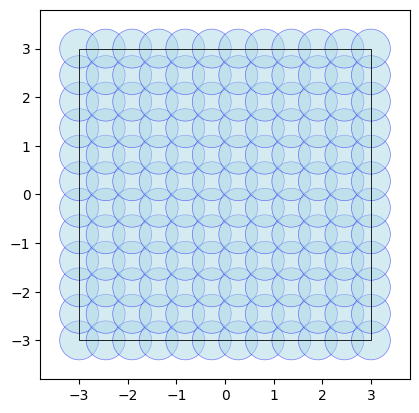

247


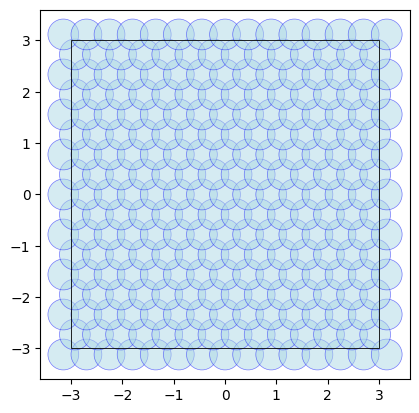

In [13]:
# Square grid
num_x = 12
num_y = 12
radius = 0.4
width = 6
height = 6
centers =  generate_square_grid(num_x,num_y,width,height)
print(len(centers))

plot_circles_with_square(centers,radius,width,height)
square_grid_pc_network = generate_place_cell_network(centers,radius,name="uniform_"+str(num_y),save=True)

# Hex grid
# Parameters
radius = 0.3
width = 6
height = 6
overlap_ratio = 0.75  # Set this to a value <1 to create overlap

# Generate the hexagonal grid with overlap
centers = generate_hex_grid(radius, width, height, overlap_ratio)
print(len(centers))

# Plot the circles and the outer square
plot_circles_with_square(centers, radius, width, height)
hex_grid_pc_network = generate_place_cell_network(centers,radius,name="uniform_hex",save=True)